In [1]:
pip install transformers datasets evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
from datasets import load_dataset

dataset = load_dataset("tweet_eval", "sentiment")

Extracting data files:   0%|          | 0/6 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/45615 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/12284 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset tweet_eval downloaded and prepared to /root/.cache/huggingface/datasets/tweet_eval/sentiment/1.1.0/12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 45615
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 12284
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [4]:
dataset["test"][0] 

{'text': "@user @user what do these '1/2 naked pics' have to do with anything? They're not even like that.",
 'label': 1}

In [5]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

In [6]:
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

In [7]:
tokenized_data = dataset.map(preprocess_function, batched=True)
tokenized_data

  0%|          | 0/46 [00:00<?, ?ba/s]

  0%|          | 0/13 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 45615
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 12284
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [8]:
# import evaluate

# accuracy = evaluate.load("accuracy")

In [9]:
pip install matplotlib

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np


# def compute_metrics(eval_pred):
#     predictions, labels = eval_pred
#     predictions = np.argmax(predictions, axis=1)
#     return accuracy.compute(predictions=predictions, references=labels)

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import time

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    # Calculate accuracy
    accuracy = accuracy_score(y_true=labels, y_pred=np.argmax(predictions, axis=1))
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_true=labels, y_pred=np.argmax(predictions, axis=1))
    
    # Calculate precision
    precision = precision_score(y_true=labels, y_pred=np.argmax(predictions, axis=1), average='weighted')
    
    # Calculate recall
    recall = recall_score(y_true=labels, y_pred=np.argmax(predictions, axis=1), average='weighted')
    
    mrecall = recall_score(y_true=labels, y_pred=np.argmax(predictions, axis=1), average='micro')
    
    mprecision = precision_score(y_true=labels, y_pred=np.argmax(predictions, axis=1), average='micro')
    
    
    
    # Log the confusion matrix as a NumPy array
#     trainer.log_metrics(confusion_matrix=cm)
# Print the confusion matrix
    print("Confusion Matrix:")
    print(cm)
    
    
     # Plot the confusion matrix as a heatmap
    labels = ["Negative", "Neutral", "Positive"]  # Replace with your class labels
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "micro-avg-recall":mrecall,
        "micro-avg-precision":mprecision
    }



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [11]:
id2label = {0: "NEGATIVE", 1: "NEUTRAL", 2 : "POSITIVE", }
label2id = {"NEGATIVE": 0, "NEUTRAL":1, "POSITIVE": 2}

In [12]:
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

In [13]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [14]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained(
    "bert-base-uncased", num_labels=3, id2label=id2label, label2id=label2id
).to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,Micro-avg-recall,Micro-avg-precision
1,0.563900,0.675612,0.689759,0.701100,0.689759,0.689759,0.689759
2,0.497100,0.721507,0.693422,0.698515,0.693422,0.693422,0.693422
3,0.382900,0.881387,0.690980,0.691781,0.690980,0.690980,0.690980


Confusion Matrix:
[[3252  585  135]
 [1598 3475  864]
 [  92  537 1746]]


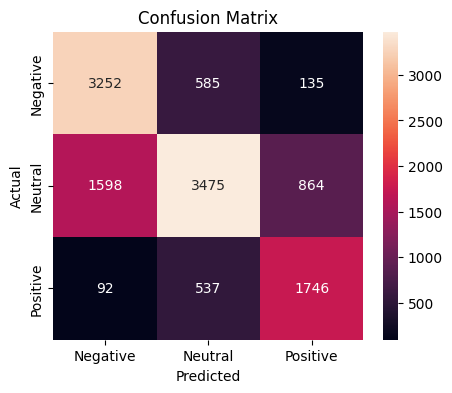

Confusion Matrix:
[[2516 1330  126]
 [ 805 4218  914]
 [  36  555 1784]]


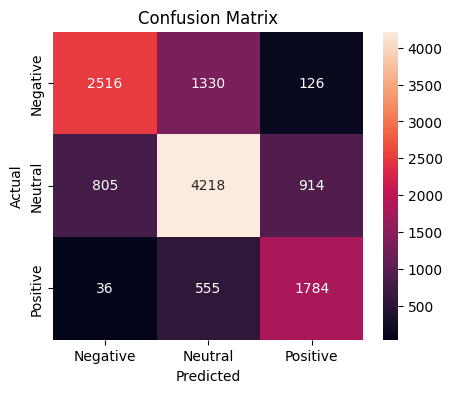

Confusion Matrix:
[[2784 1094   94]
 [1094 4036  807]
 [  52  655 1668]]


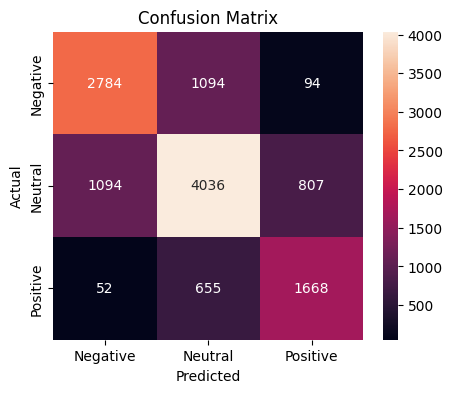

In [ ]:
start_time = time.time()

training_args = TrainingArguments(
    output_dir="bert-5-epoch-sentiment",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_data["train"],
    eval_dataset=tokenized_data["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

trainer.train()

# Record the end time
end_time = time.time()

# Calculate and print the elapsed time
elapsed_time = end_time - start_time
print(f"Training elapsed time: {elapsed_time} seconds")

In [ ]:
# save_directory = "/kaggle/Output/Models/"
# tokenizer.save_pretrained(save_directory)
# model.save_pretrained(save_directory)
#  tok = AutoTokenizer. from_pretrained(save_directory)
#  mod = AutoModelForSequenceClassification.from_pretrained(save_directory)

In [ ]:
trainer.evaluate(tokenized_data["test"])

In [ ]:
# trainer.predict(test_dataset)

In [ ]:
# trainer.predict(test_dataset)[1].shape

In [ ]:
output=trainer.predict(tokenized_data['test'])

In [ ]:
output

In [ ]:
output.predictions

In [ ]:
output.label_ids

In [ ]:
# import numpy as np

# labels = np.array(tokenized_data['test']['label'])
# labels

In [ ]:
# tokenized_data['test']['label']

In [ ]:
# from sklearn.metrics import confusion_matrix

# cm=confusion_matrix(tokenized_data['test']['label'],output.label_ids)
# cm

In [ ]:
# from sklearn import metrics
# # metrics.plot_confusion_matrix(model,tokenized_data['train']['label'] ,tokenized_data['test']['label'], display_labels=['0','1','2'])
# confusion = metrics.confusion_matrix(tokenized_data['test']['label'],output.label_ids)
# confusion.ravel() 

# accuracy = metrics.accuracy_score(tokenized_data['test']['label'],output.label_ids)
# print(accuracy)

# precision_positive = metrics.precision_score(tokenized_data['test']['label'],output.label_ids, average='weighted')
# print(precision_positive)

# recall_sensitivity = metrics.recall_score(tokenized_data['test']['label'],output.label_ids, average='weighted')
# print(recall_sensitivity)

In [ ]:
# model.save_pretrained('./model')
# tokenizer.save_pretrained('./model')

In [ ]:
# trainer.save_model('./model')

In [ ]:
# !pip install huggingface-cli


In [ ]:
# trainer.save_model("/kaggle/output/my_transformer_model")

In [ ]:
# !huggingface-cli login

In [ ]:
# from huggingface_hub import notebook_login

# notebook_login()

In [ ]:
# model.push_to_hub('bert-5-epoch-sentiment')

In [ ]:
# tokenizer.push_to_hub('bert-5-epoch-sentiment')

In [ ]:
# trainer.push_to_hub('bert-5-epoch-sentiment')